<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/BT3_CLBH_SHOPEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo các biến đầu vào
product_demand = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'product_demand')
competitor_pricing_pressure = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'competitor_pricing_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'seasonal_demand')

# Khai báo biến đầu ra
discount_percentage = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'discount_percentage')

# Định nghĩa các hàm thành viên
product_demand.automf(names=['low', 'medium', 'high'])
competitor_pricing_pressure.automf(names=['low', 'medium', 'high'])
store_reputation.automf(names=['low', 'medium', 'high'])
profit_margin.automf(names=['low', 'medium', 'high'])
seasonal_demand.automf(names=['none', 'moderate', 'high'])
discount_percentage.automf(names=['very_low', 'low', 'medium', 'high', 'very_high'])



In [3]:
# Định nghĩa các quy tắc mờ
rules = [
    ctrl.Rule(product_demand['high'] & competitor_pricing_pressure['low'] & profit_margin['low'], discount_percentage['very_low']),
    ctrl.Rule(product_demand['low'] & competitor_pricing_pressure['high'] & profit_margin['high'], discount_percentage['high']),
    ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium']),
    ctrl.Rule(competitor_pricing_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high']),
    ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium']),
    ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pricing_pressure['low'], discount_percentage['very_low']),
    ctrl.Rule(profit_margin['high'] & competitor_pricing_pressure['medium'] & seasonal_demand['moderate'], discount_percentage['medium'])
]

# Tạo hệ thống điều khiển
discount_control = ctrl.ControlSystem(rules)
discount_simulation = ctrl.ControlSystemSimulation(discount_control)


<bound method FuzzyVariable.view of Consequent: discount_percentage>

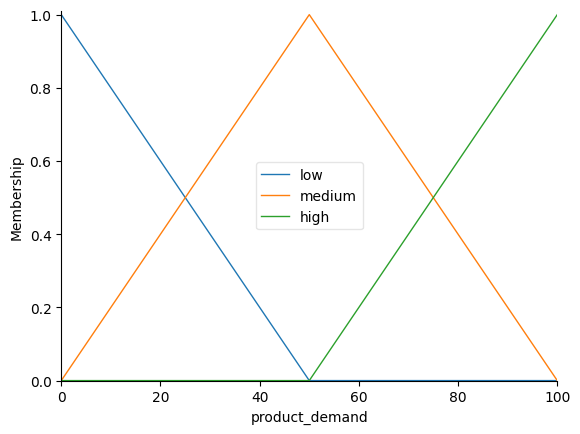

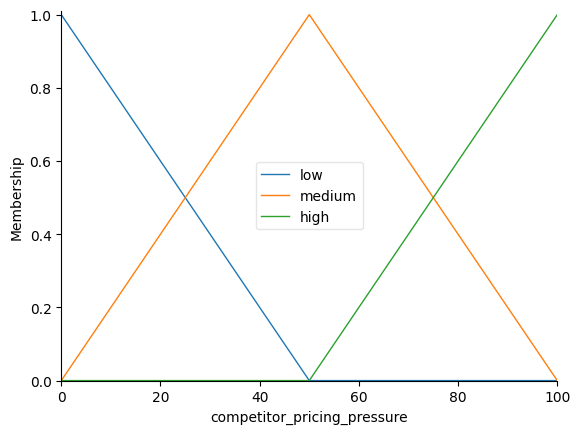

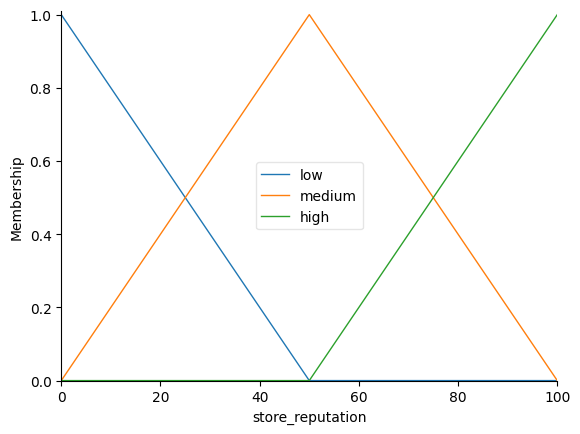

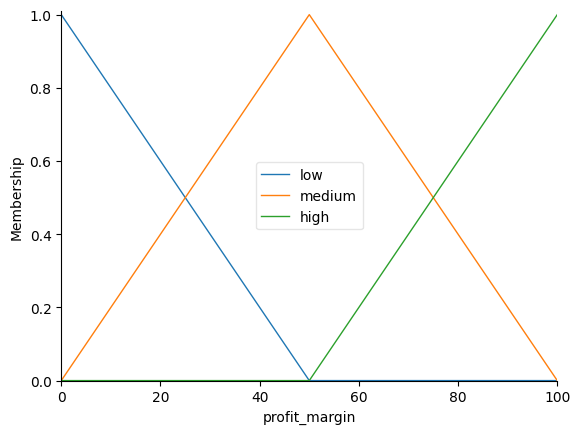

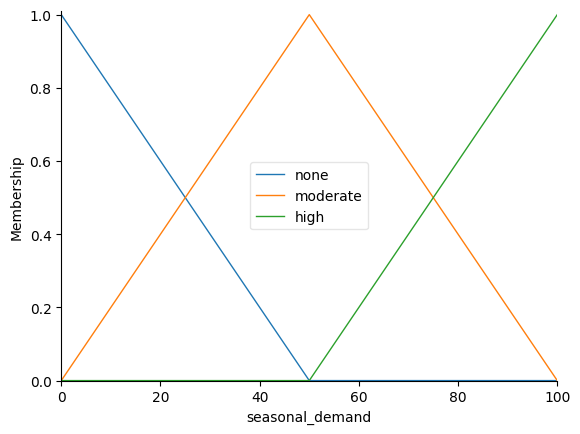

In [4]:
product_demand.view()
competitor_pricing_pressure.view()
store_reputation.view()
profit_margin.view()
seasonal_demand.view()
discount_percentage.view

Discount Percentage: 50.00000000000006%
Discount Level: Very High


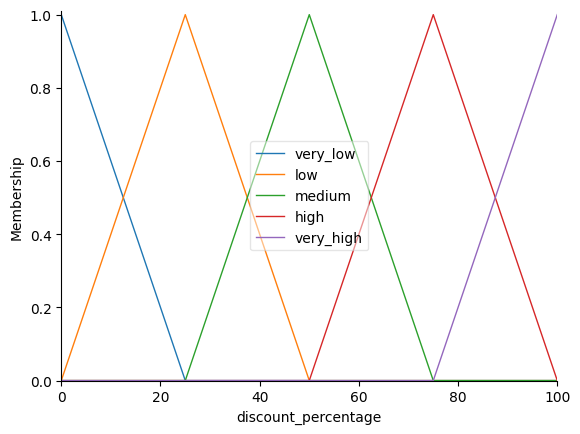

In [7]:
discount_percentage.view()

# Ví dụ đầu vào cho sản phẩm đồng hồ xa xỉ thủ công
discount_simulation.input['product_demand'] = 80  # Cao
discount_simulation.input['competitor_pricing_pressure'] = 50  # Trung bình
discount_simulation.input['store_reputation'] = 60  # Trung bình (4.2 sao)
discount_simulation.input['profit_margin'] = 80  # Cao
discount_simulation.input['seasonal_demand'] = 70  # Cao (Khuyến mãi Shopee 11.11)

discount_simulation.compute()
print(f"Discount Percentage: {discount_simulation.output['discount_percentage']}%")

# In mức giảm giá
def get_discount_level(discount):
    if discount < 5:
        return "Very Low"
    elif discount < 10:
        return "Low"
    elif discount < 20:
        return "Medium"
    elif discount < 40:
        return "High"
    else:
        return "Very High"

discount_level = get_discount_level(discount_simulation.output['discount_percentage'])
print(f"Discount Level: {discount_level}")